In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2274113271221744801
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4162256896
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12046457502906875613
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [3]:
import os
os.environ['KAGGLE_USERNAME']='nuttunyodsanga'
os.environ['KAGGLE_KEY']='742d8ae7e33027340f8d0020dbcf36f0'

In [4]:
!kaggle competitions download -c digit-recognizer

digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile as zf

files = zf.ZipFile("digit-recognizer.zip",'r')
files.extractall()
files.close()

In [6]:
train = pd.read_csv("train.csv")

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(train.shape)

(42000, 785)


In [9]:
x_test_kaggle_file = pd.read_csv("test.csv")

In [10]:
x_test_kaggle_file.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print(x_test_kaggle_file.shape)

(28000, 784)


In [12]:
y_train = train['label']
x_train=train.drop(labels=['label'],axis=1)

In [13]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

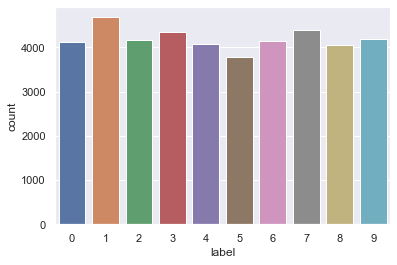

In [14]:
sns.countplot(y_train)

In [15]:
def trainex(i):
    pic = x_train.iloc[i].to_numpy()
    pic = pic.reshape((28,28))
    plt.title(y_train[i])
    plt.axis("off")
    plt.imshow(pic,cmap='Greys')

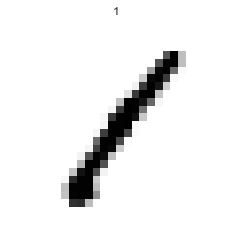

In [16]:
trainex(0)

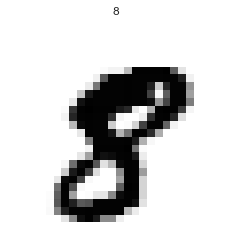

In [17]:
trainex(10)

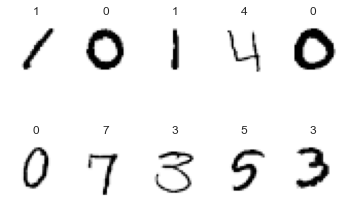

In [18]:
for i in range (10):
    plt.subplot(2,5,i+1)
    trainex(i)

In [19]:
x_train = x_train / 255.
x_test_kaggle_file = x_test_kaggle_file / 255.
x_train = x_train.values.reshape(-1,28,28,1)
x_test_kaggle_file = x_test_kaggle_file.values.reshape(-1,28,28,1)

In [20]:
x_train.shape

(42000, 28, 28, 1)

In [21]:
x_test_kaggle_file.shape

(28000, 28, 28, 1)

In [22]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.1, random_state=33)
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train, test_size = 1/9, random_state=33)


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [25]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=4, verbose=1,  factor=0.4, min_lr=0.0001)

In [28]:
history=model.fit(x_train, y_train, epochs=20,batch_size =300 ,validation_data=(x_val, y_val), verbose =2,callbacks=[lr_reduction])

Epoch 1/20
112/112 - 8s - loss: 0.3893 - accuracy: 0.8744 - val_loss: 0.0788 - val_accuracy: 0.9767 - lr: 0.0010 - 8s/epoch - 69ms/step
Epoch 2/20
112/112 - 4s - loss: 0.0961 - accuracy: 0.9717 - val_loss: 0.0471 - val_accuracy: 0.9864 - lr: 0.0010 - 4s/epoch - 35ms/step
Epoch 3/20
112/112 - 4s - loss: 0.0640 - accuracy: 0.9806 - val_loss: 0.0412 - val_accuracy: 0.9864 - lr: 0.0010 - 4s/epoch - 35ms/step
Epoch 4/20
112/112 - 4s - loss: 0.0543 - accuracy: 0.9846 - val_loss: 0.0435 - val_accuracy: 0.9876 - lr: 0.0010 - 4s/epoch - 36ms/step
Epoch 5/20
112/112 - 4s - loss: 0.0420 - accuracy: 0.9874 - val_loss: 0.0344 - val_accuracy: 0.9890 - lr: 0.0010 - 4s/epoch - 36ms/step
Epoch 6/20
112/112 - 4s - loss: 0.0376 - accuracy: 0.9889 - val_loss: 0.0351 - val_accuracy: 0.9893 - lr: 0.0010 - 4s/epoch - 35ms/step
Epoch 7/20
112/112 - 4s - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0358 - val_accuracy: 0.9888 - lr: 0.0010 - 4s/epoch - 36ms/step
Epoch 8/20
112/112 - 4s - loss: 0.0314 - accurac

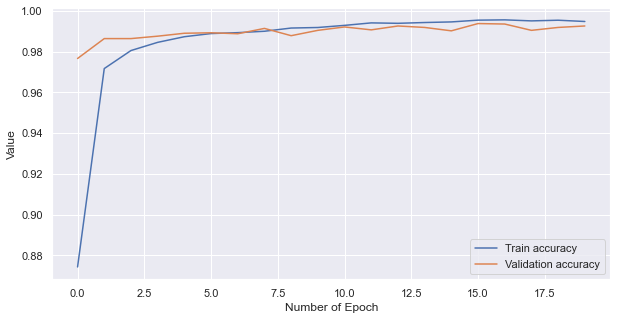

In [29]:
plt.figure(figsize=(10,5))
plt.plot(model.history.history['accuracy'], label='Train accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation accuracy')
plt.ylabel('Value')
plt.xlabel('Number of Epoch')
plt.legend()
plt.show()

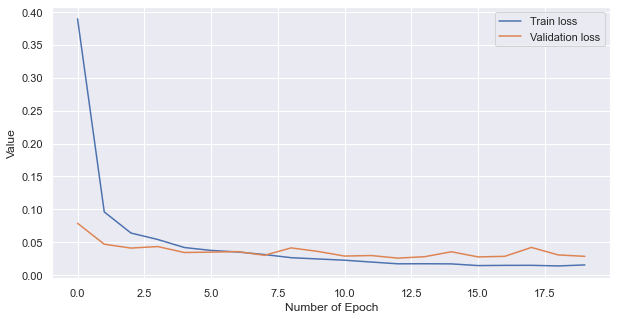

In [30]:
plt.figure(figsize=(10,5))
plt.plot(model.history.history['loss'], label='Train loss')
plt.plot(model.history.history['val_loss'], label='Validation loss')
plt.ylabel('Value')
plt.xlabel('Number of Epoch')
plt.legend()
plt.show()

In [31]:
model.evaluate(x_test,y_test)

132/132 [==============================] - 1s 5ms/step - loss: 0.0206 - accuracy: 0.9926


[0.020634077489376068, 0.9926190376281738]

In [32]:
y_predict = model.predict(x_test)

In [33]:
y_predict

array([[1.2873955e-13, 1.2407826e-10, 2.5516712e-14, ..., 6.7148687e-09,
        3.6914785e-13, 3.2554592e-08],
       [6.4968242e-10, 1.1380906e-12, 3.0016324e-13, ..., 6.1718602e-06,
        3.7762486e-08, 9.9994826e-01],
       [3.1716959e-06, 2.8446605e-04, 1.3207786e-02, ..., 9.8640454e-01,
        7.2667237e-05, 1.4562298e-08],
       ...,
       [4.3583259e-11, 1.0000000e+00, 3.9520817e-12, ..., 7.3505353e-09,
        1.3867728e-10, 7.9171240e-13],
       [1.5524561e-11, 3.6554607e-06, 3.7433178e-08, ..., 1.7210321e-12,
        2.8818556e-07, 6.9891236e-14],
       [5.5931425e-17, 2.7847843e-14, 3.0494137e-13, ..., 1.0000000e+00,
        1.6737974e-11, 4.9605035e-11]], dtype=float32)

In [34]:
y_predict_max = np.argmax(y_predict,axis=1) 
y_predict_max

array([3, 9, 7, ..., 1, 6, 7], dtype=int64)

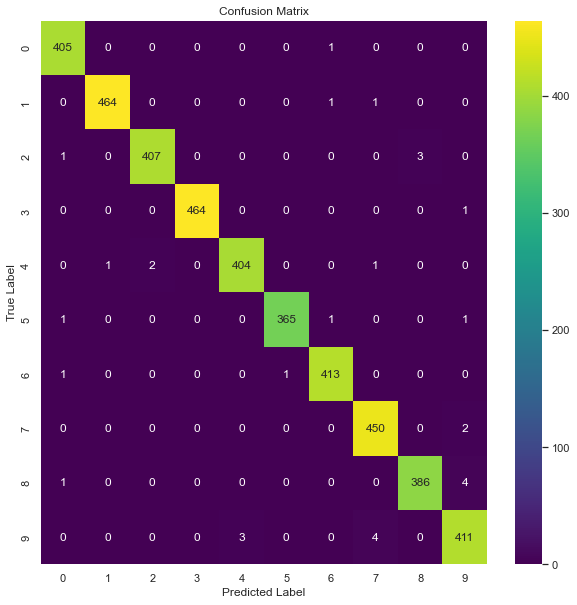

In [35]:
from sklearn.metrics import confusion_matrix
y_true = np.argmax(y_test,axis = 1) 
table = confusion_matrix(y_true, y_predict_max) 
fix,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(table, annot=True, cmap="viridis", fmt= 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [36]:
y_kaggle_test = model.predict(x_test_kaggle_file)
y_kaggle_test = np.argmax(y_kaggle_test,axis = 1)
y_kaggle_test_series = pd.Series(y_kaggle_test,name="Label")
results = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_kaggle_test_series ],axis = 1)
results.to_csv("kaggke_test_result.csv")